In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import struct
from collections import defaultdict

In [5]:
data = pd.read_csv("data.csv")
data2 = pd.read_csv("data_secondary.csv")

# data.head(1)
data2.head(1)

,b'ride_date',b'rover',b'radar_secondary_list',b'radar_secondary_data',b'message_ts',b'radar_secondary_yson_msg',b'log_time',b'ride_time'
0,b'2025-01-23',b'matar',"[205, 204, 124, 65, 51, 51, 27, 65, 0, 0, 0, 0...","[205, 204, 124, 65, 51, 51, 27, 65, 0, 0, 0, 0...",1737586875405325787,"{b'row_step': 2176, b'height': 1, b'fields': [...",b'01:18:21',b'01:18:21'


In [6]:
datatypes = {7: 4, 1: 1}
point_step = 64
tags_raw = (
    {b"name": "x", b"datatype": 7, b"count": 1, b"offset": 0},
    {b"name": "y", b"datatype": 7, b"count": 1, b"offset": 4},
    {b"name": "z", b"datatype": 7, b"count": 1, b"offset": 8},
    {b"name": "obj_vrel_long", b"datatype": 7, b"count": 1, b"offset": 12},
    {b"name": "obj_lat_speed", b"datatype": 7, b"count": 1, b"offset": 16},
    {b"name": "obj_rcs_value", b"datatype": 7, b"count": 1, b"offset": 20},
    {b"name": "radial_speed_absolute", b"datatype": 7, b"count": 1, b"offset": 24},
    {b"name": "distance_accuracy", b"datatype": 7, b"count": 1, b"offset": 28},
    {b"name": "angle_accuracy", b"datatype": 7, b"count": 1, b"offset": 32},
    {b"name": "pdh0", b"datatype": 7, b"count": 1, b"offset": 36},
    {b"name": "dist_long_rms", b"datatype": 7, b"count": 1, b"offset": 40},
    {b"name": "dist_lat_rms", b"datatype": 7, b"count": 1, b"offset": 44},
    {b"name": "v_long_rms", b"datatype": 7, b"count": 1, b"offset": 48},
    {b"name": "v_lat_rms", b"datatype": 7, b"count": 1, b"offset": 52},
    {b"name": "dyn_prop", b"datatype": 1, b"count": 1, b"offset": 56},
    {b"name": "range", b"datatype": 1, b"count": 1, b"offset": 57},
    {b"name": "has_quality", b"datatype": 1, b"count": 1, b"offset": 58},
    {b"name": "invalid", b"datatype": 1, b"count": 1, b"offset": 60},
    {b"name": "ambig", b"datatype": 1, b"count": 1, b"offset": 59},
)
tags = {i[b"name"]: (datatypes[i[b"datatype"]], i[b"offset"]) for i in tags_raw}

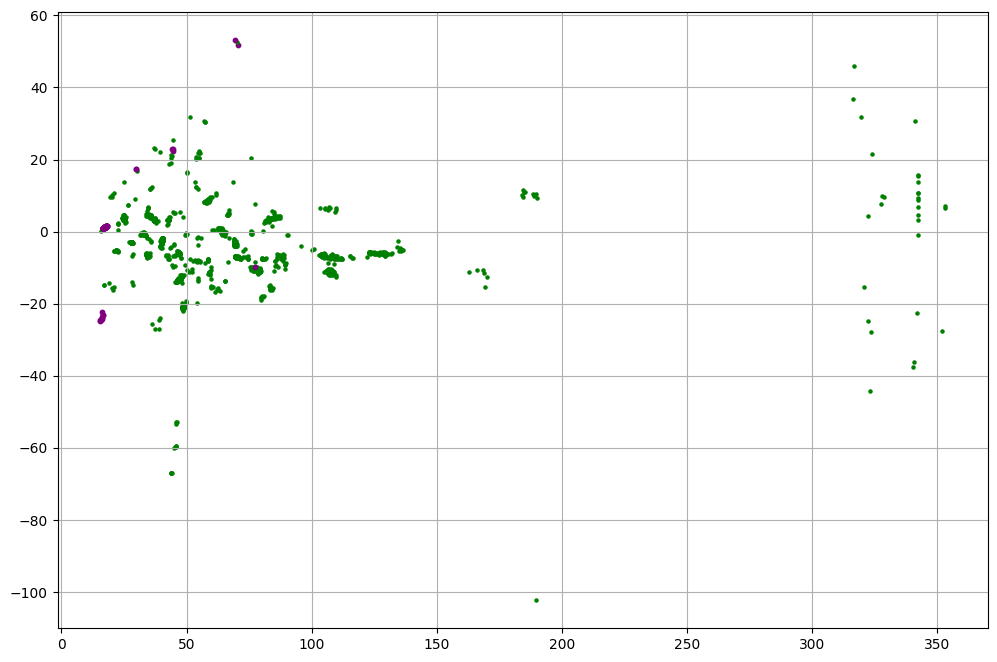

In [7]:
plt.figure(figsize=(12, 8))
plt.grid()

for i, date_i in enumerate(data["b'radar_primary_list'"]):
    raw_dots = bytes(map(int, date_i[1:-1].split(", ")))
    parsed = defaultdict(list)
    for j in range(len(raw_dots) // 64):
        for tag_key, (tag_len, tag_offs) in tags.items():
            match tag_len:
                case 4:
                    parsed[tag_key].append(
                        struct.unpack(
                            "f",
                            raw_dots[j * 64 + tag_offs : j * 64 + tag_offs + tag_len],
                        )
                    )
                case 1:
                    parsed[tag_key].append(
                        raw_dots[
                            j * 64 + tag_offs : j * 64 + tag_offs + tag_len
                        ].decode()
                    )
    pdh0_75 = [i == (0.75,) for i in parsed["pdh0"]]
    plt.scatter(
        np.array(parsed["x"])[pdh0_75],
        np.array(parsed["y"])[pdh0_75],
        color="green",
        s=5,
    )
    pdh0_25 = [not i for i in pdh0_75]
    plt.scatter(
        np.array(parsed["x"])[pdh0_25],
        np.array(parsed["y"])[pdh0_25],
        color="purple",
        s=10,
    )


plt.show()